# Nama       : Farhan Widyanto Wibowo
# NRP        : 5025221209
# Project    : Prediction House Price in Jakarta

In [45]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}") 

pandas version: 2.2.3
NumPy version: 2.2.4
matplotlib version: 3.10.1


In [46]:
# Baca data
df = pd.read_csv('data/HARGA_RUMAH_JAKSEL.csv', header=1)


In [47]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,"28,000,000,000",1100,700,5,6,ADA,JAKSEL
1,"19,000,000,000",824,800,4,4,ADA,JAKSEL
2,"4,700,000,000",500,400,4,3,ADA,JAKSEL
3,"4,900,000,000",251,300,5,4,ADA,JAKSEL
4,"28,000,000,000",1340,575,4,5,ADA,JAKSEL


In [48]:
print("Kolom dalam DataFrame:", df.columns.tolist())
price_col = [col for col in df.columns if 'HARGA' in col.upper()][0]
print(f"Menggunakan kolom harga: {price_col}\n")


# Hapus karakter non-digit, ubah ke numeric, lalu konversi ke int (tanpa decimal)
df[price_col] = (
    df[price_col]
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
    .pipe(pd.to_numeric, errors='coerce')
    .fillna(0)
    .astype(int)
)
df.info()

Kolom dalam DataFrame: ['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']
Menggunakan kolom harga: HARGA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [49]:
#Mengganti satuan harga agar lebih readable
df['HARGA'] = (df['HARGA']/1000000).astype(int)

In [50]:
# menghapus feature kota karena semua data berasal dari JAKSEL
df = df.drop(columns=['KOTA'])
df.head()


,HARGA,LT,LB,JKT,JKM,GRS
0,28000,1100,700,5,6,ADA
1,19000,824,800,4,4,ADA
2,4700,500,400,4,3,ADA
3,4900,251,300,5,4,ADA
4,28000,1340,575,4,5,ADA


### Data Analysis 

In [51]:
df.describe()


,HARGA,LT,LB,JKT,JKM
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,17474.719281,530.504496,487.275724,4.457542,3.940060
std,20795.482161,531.069773,452.872262,2.004606,1.903261
min,430.000000,22.000000,38.000000,1.000000,1.000000
25%,6750.000000,220.000000,300.000000,4.000000,3.000000
50%,13500.000000,400.000000,411.000000,4.000000,4.000000
75%,20000.000000,677.000000,600.000000,5.000000,4.000000
max,250000.000000,6790.000000,10000.000000,27.000000,27.000000


In [52]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")

Jumlah data duplicated: 70

In [53]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplicated:", df.duplicated().sum(), end="")

Jumlah data duplicated: 0

In [54]:
# Cek Nilai Hilang
print("Jumlah nilai hilang per kolom:")
print(df.isnull().sum(), end="\n\n")


Jumlah nilai hilang per kolom:
HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
dtype: int64



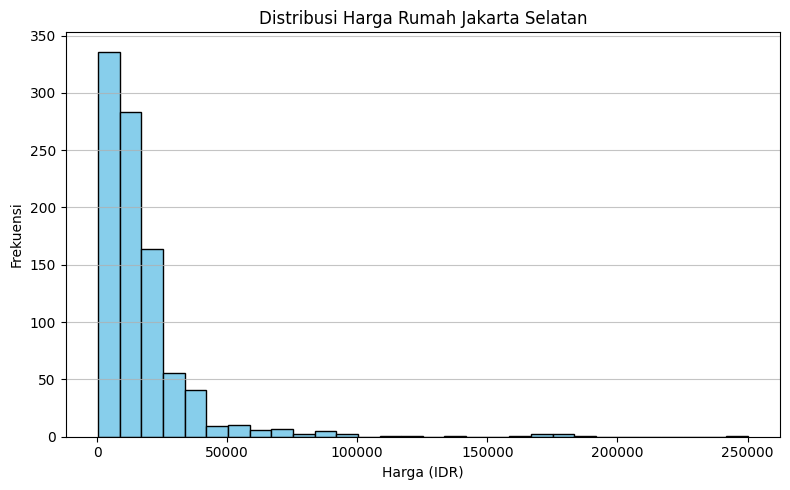

In [55]:
# df.HARGA.plot.hist();
# 3. Plot histogram distribusi harga
plt.figure(figsize=(8, 5))
plt.hist(df[price_col], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Rumah Jakarta Selatan')
plt.xlabel('Harga (IDR)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1229596645.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1229596645.py:15: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1229596645.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952

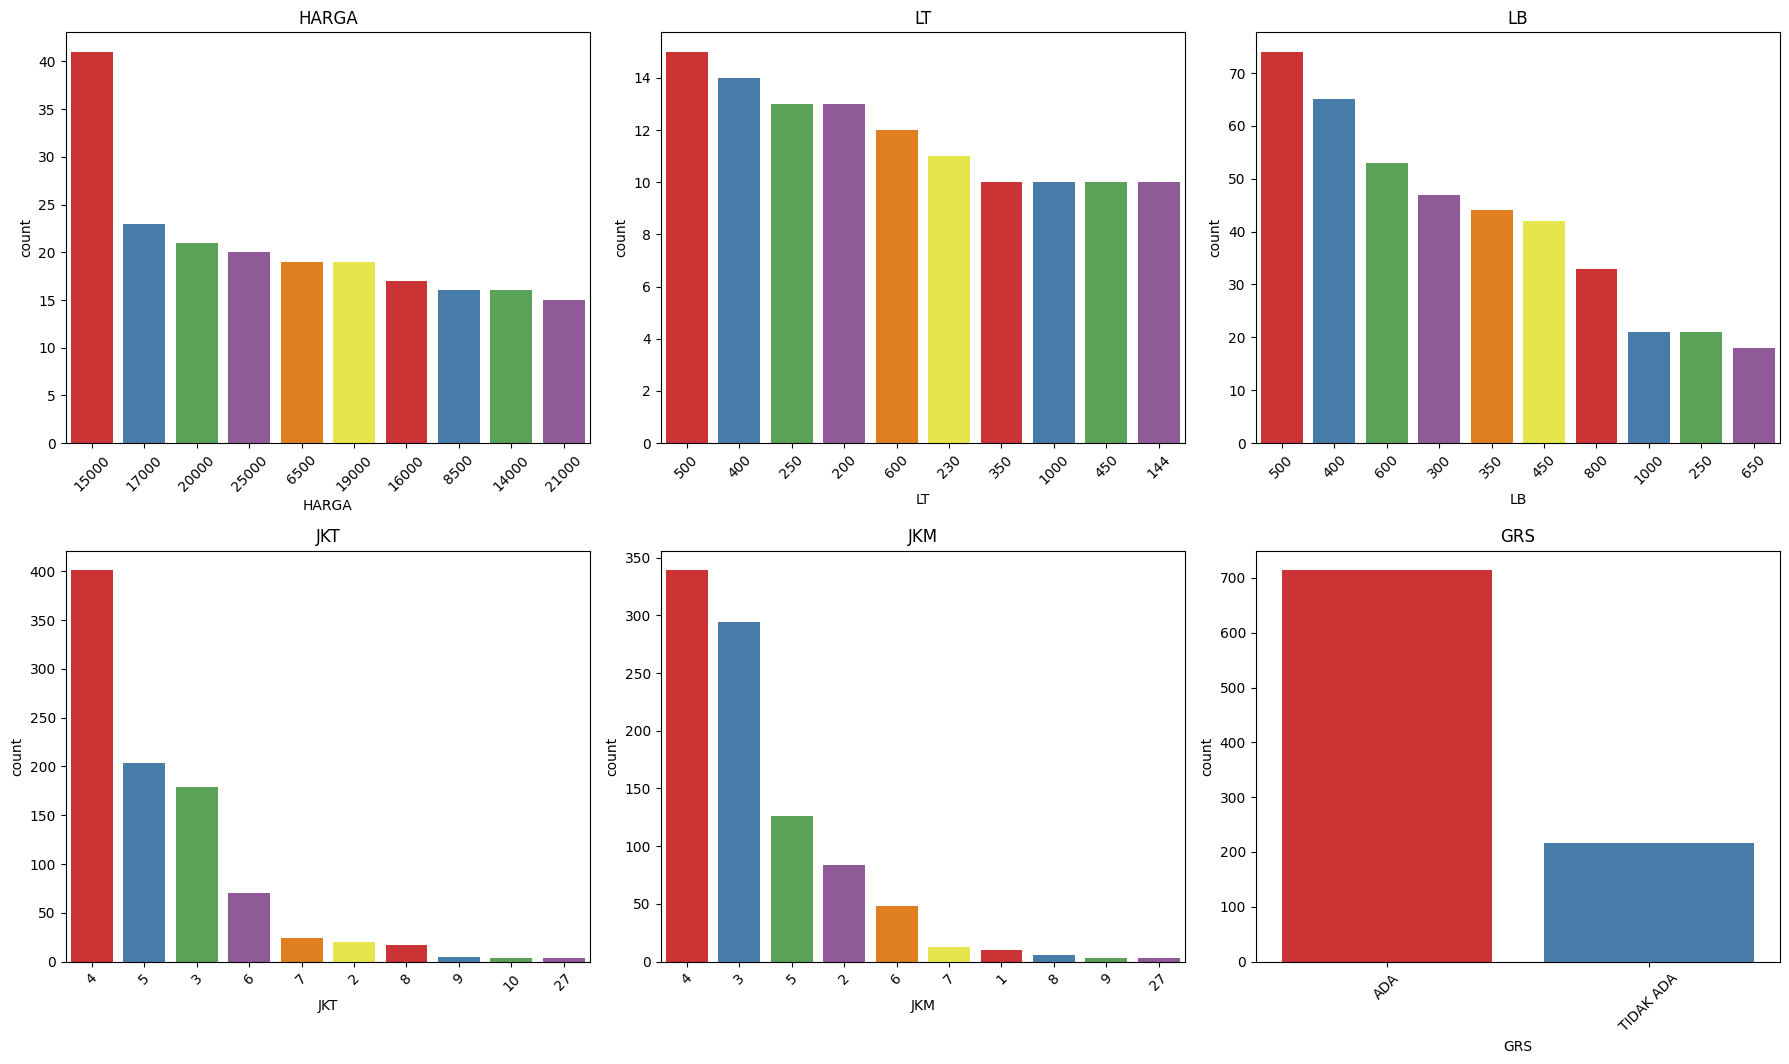

In [56]:
color_palette = sns.color_palette("Set1", len(df.columns))

n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = df[column].value_counts().nlargest(10).index
    
    filtered_df = df[df[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1245511591.py:9: UserWarning: Ignoring `palette` because no `hue` variable has b

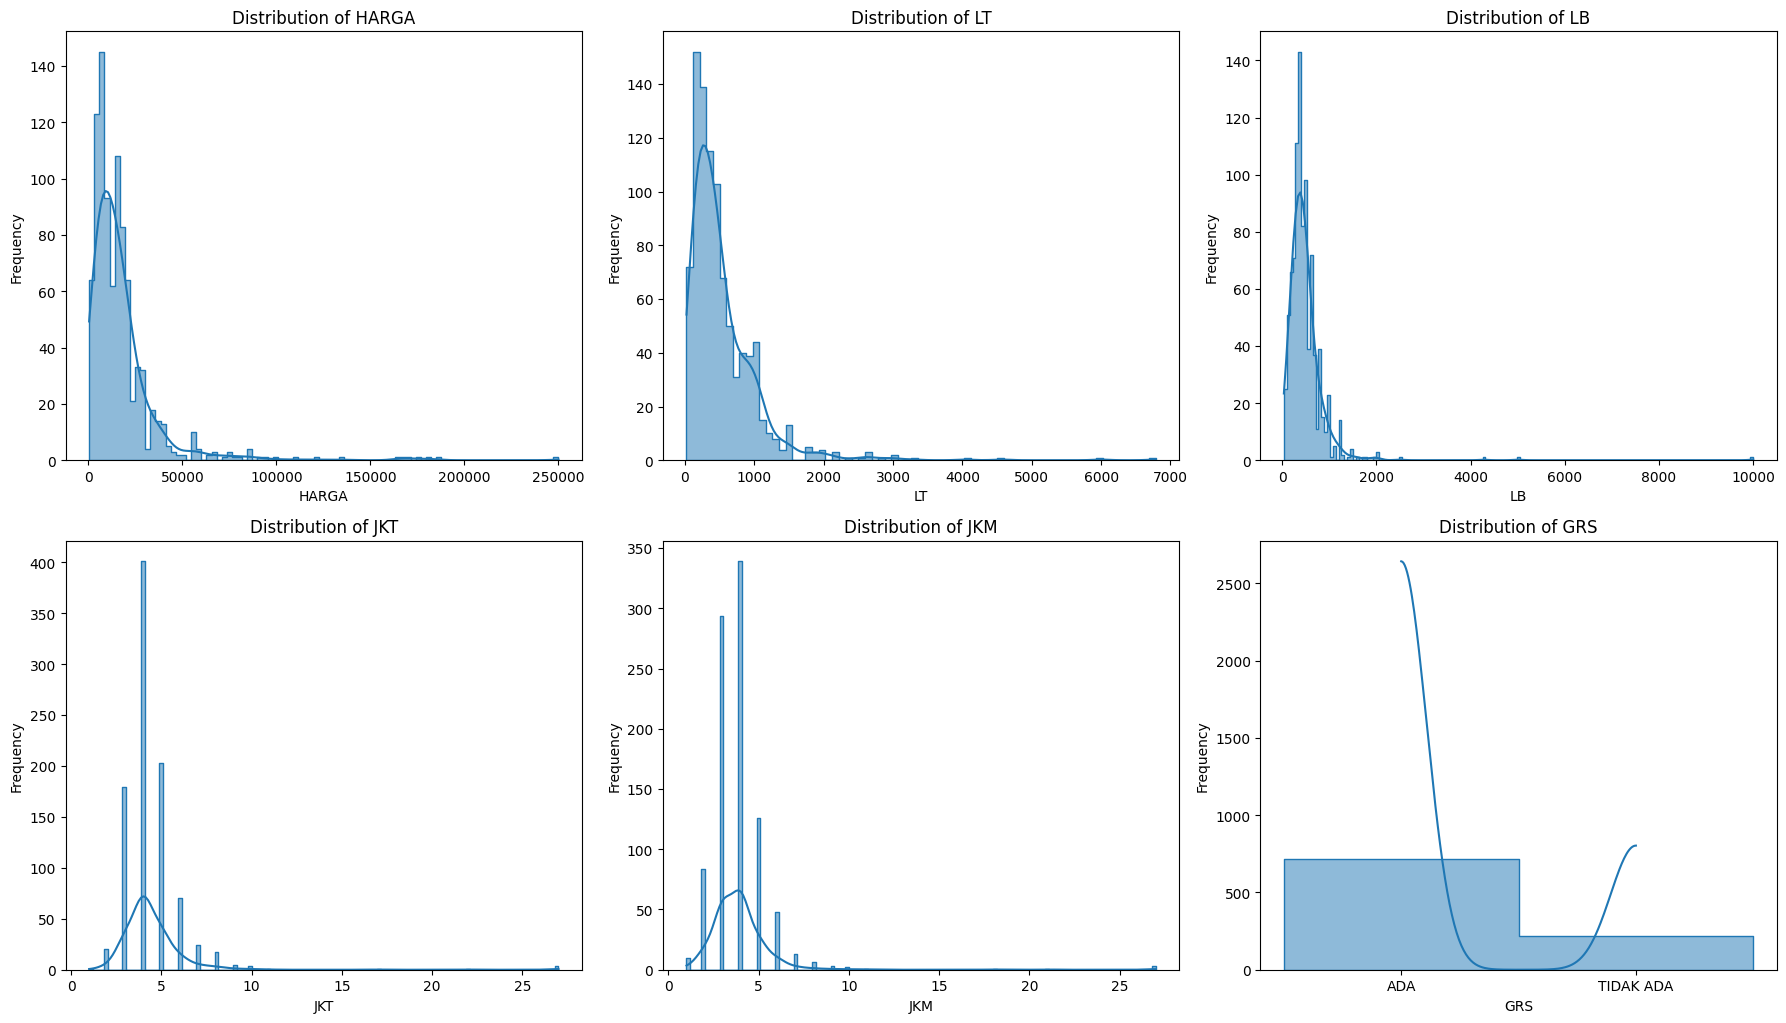

In [57]:
n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=df, x=column, kde=True, palette='Set1', element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [58]:
df['GRS'] = df['GRS'].apply(lambda x: 1 if str(x).strip().upper() == 'ADA' else 0)
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,28000,1100,700,5,6,1
1,19000,824,800,4,4,1
2,4700,500,400,4,3,1
3,4900,251,300,5,4,1
4,28000,1340,575,4,5,1


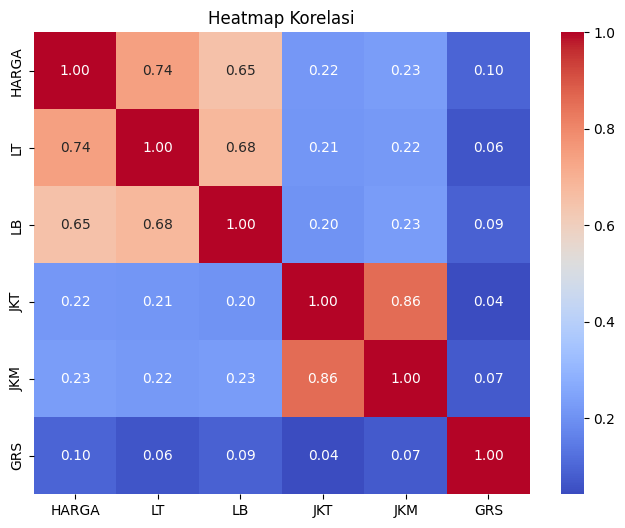

In [59]:
corr = df.corr()

# Gambar heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

### Data Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Mengimport CatboostRegressor dan sklearn

In [61]:
print(f"Bentuk DataFrame sebelum penghapusan outlier: {df.shape}")

Bentuk DataFrame sebelum penghapusan outlier: (931, 6)


In [ ]:
if 'HARGA' in df.columns:
        Q1_harga = df['HARGA'].quantile(0.25)
        Q3_harga = df['HARGA'].quantile(0.75)
        IQR_harga = Q3_harga - Q1_harga
        lower_bound_harga = Q1_harga - 1.5 * IQR_harga
        upper_bound_harga = Q3_harga + 1.5 * IQR_harga

        outliers_harga = df[(df['HARGA'] < lower_bound_harga) | (df['HARGA'] > upper_bound_harga)]
        print(f"\nJumlah outlier terdeteksi di 'HARGA' menggunakan IQR: {len(outliers_harga)}")
        
        df = df[(df['HARGA'] >= lower_bound_harga) & (df['HARGA'] <= upper_bound_harga)]
        print(f"Bentuk DataFrame setelah penghapusan outlier di 'HARGA': {df.shape}")
else:
        print("Kolom 'HARGA' tidak ditemukan, penghapusan outlier untuk target dilewati.")


Jumlah outlier terdeteksi di 'HARGA' menggunakan IQR: 60
Bentuk DataFrame setelah penghapusan outlier di 'HARGA': (871, 6)


In [66]:
numerical_features_for_outlier_removal = []
if 'LT' in df.columns and pd.api.types.is_numeric_dtype(df['LT']):
        numerical_features_for_outlier_removal.append('LT')
if 'LB' in df.columns and pd.api.types.is_numeric_dtype(df['LB']):
        numerical_features_for_outlier_removal.append('LB')

In [69]:
if numerical_features_for_outlier_removal:
    print(f"\nMemproses outlier untuk fitur numerik: {numerical_features_for_outlier_removal}")
    for feature in numerical_features_for_outlier_removal:
        if feature in df.columns: # Pastikan kolom masih ada
            Q1_feat = df[feature].quantile(0.25)
            Q3_feat = df[feature].quantile(0.75)
            IQR_feat = Q3_feat - Q1_feat
            lower_bound_feat = Q1_feat - 1.5 * IQR_feat
            upper_bound_feat = Q3_feat + 1.5 * IQR_feat

            outliers_feat = df[(df[feature] < lower_bound_feat) | (df[feature] > upper_bound_feat)]
            if not outliers_feat.empty:
                print(f"Jumlah outlier terdeteksi di '{feature}' menggunakan IQR: {len(outliers_feat)}")
                df = df[(df[feature] >= lower_bound_feat) & (df[feature] <= upper_bound_feat)]
                print(f"Bentuk DataFrame setelah penghapusan outlier di '{feature}': {df.shape}")
            else:
                print(f"Tidak ada outlier terdeteksi di '{feature}' menggunakan IQR.")
        else:
            print(f"Kolom '{feature}' tidak lagi ditemukan dalam DataFrame, dilewati.")
else:
    print("\nTidak ada fitur numerik spesifik yang dipilih untuk penghapusan outlier, atau fitur tersebut tidak ada/bukan numerik.")
    
print(f"\nBentuk DataFrame final setelah semua penghapusan outlier: {df.shape}")
    



Memproses outlier untuk fitur numerik: ['LT', 'LB']
Jumlah outlier terdeteksi di 'LT' menggunakan IQR: 29
Bentuk DataFrame setelah penghapusan outlier di 'LT': (842, 6)
Jumlah outlier terdeteksi di 'LB' menggunakan IQR: 29
Bentuk DataFrame setelah penghapusan outlier di 'LB': (813, 6)

Bentuk DataFrame final setelah semua penghapusan outlier: (813, 6)


In [ ]:
if not df.empty and 'HARGA' in df.columns:
    X = df.drop('HARGA', axis=1)
    y = df['HARGA']
elif 'HARGA' in df.columns:
    print("DataFrame kosong, X dan y akan kosong.")
    X = pd.DataFrame(columns=[col for col in df.columns if col != 'HARGA'])
    y = pd.Series(name='HARGA', dtype=float)
else:
    print("DataFrame kosong dan kolom HARGA tidak ada. X dan y akan kosong.")
    X = pd.DataFrame()
    y = pd.Series(dtype=float)

In [ ]:
if not X.empty:
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_features = [col for col in categorical_features if col in X.columns]
else:
    categorical_features = []
        
print(f"\nFitur kategorikal yang diidentifikasi untuk CatBoost: {categorical_features}")

if not X.empty:
    for col in categorical_features:
        if X[col].isnull().any():
            X[col] = X[col].fillna('MISSING')
            print(f"Mengisi NaN pada kolom kategorikal '{col}' dengan 'MISSING'.")

    numerical_features_in_X = X.select_dtypes(include=np.number).columns.tolist()
    for col in numerical_features_in_X:
        if X[col].isnull().any():
            median_val = X[col].median()
            X[col] = X[col].fillna(median_val)
            print(f"Mengisi NaN pada kolom numerik '{col}' dengan median ({median_val}).")
            
    print("\nMemeriksa NaN di X setelah pengisian:")
    print(X.isnull().sum())
    print("\nMemeriksa NaN di y:")
    print(y.isnull().sum())
else:
    print("X kosong, pemeriksaan NaN dilewati.")


Fitur kategorikal yang diidentifikasi untuk CatBoost: []

Memeriksa NaN di X setelah pengisian:
LT     0
LB     0
JKT    0
JKM    0
GRS    0
dtype: int64

Memeriksa NaN di y:
0


In [ ]:
if X.empty or y.empty:
    print("\nDataset X atau y kosong. Modeling tidak dapat dilanjutkan.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\nBentuk set training: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Bentuk set test: X_test={X_test.shape}, y_test={y_test.shape}")

    cat_features_for_model = [col for col in categorical_features if col in X_train.columns]
        
    print(f"Fitur kategorikal yang diteruskan ke CatBoost: {cat_features_for_model}")

    model = CatBoostRegressor(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        loss_function='RMSE',
        eval_metric='MAE',
        cat_features=cat_features_for_model,
        random_seed=42,
        verbose=100,
        early_stopping_rounds=50
    )

    print("\nTraining CatBoost Regressor...")
    model.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
    )

    # 5. Buat Prediksi
    print("\nMembuat prediksi pada test set...")
    y_pred = model.predict(X_test)

    # 6. Evaluasi Model
    print("\nMengevaluasi model...")
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.2f} (Jutaan Rp)")
    print(f"Mean Squared Error (MSE): {mse:.2f} ((Jutaan Rp)^2)") 
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} (Jutaan Rp)")
    print(f"R-squared (R2 Score): {r2:.4f}")


Bentuk set training: X_train=(650, 5), y_train=(650,)
Bentuk set test: X_test=(163, 5), y_test=(163,)
Fitur kategorikal yang diteruskan ke CatBoost: []

Training CatBoost Regressor...
0:	learn: 6144.3200887	test: 6460.6933535	best: 6460.6933535 (0)	total: 157ms	remaining: 2m 36s
100:	learn: 2743.1600283	test: 3383.4132642	best: 3381.5212016 (99)	total: 269ms	remaining: 2.39s
200:	learn: 2462.2032133	test: 3319.3619266	best: 3316.8957309 (195)	total: 367ms	remaining: 1.46s
300:	learn: 2260.1448844	test: 3278.1225895	best: 3276.8047151 (292)	total: 469ms	remaining: 1.09s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 3276.804715
bestIteration = 292

Shrink model to first 293 iterations.

Membuat prediksi pada test set...

Mengevaluasi model...
Mean Absolute Error (MAE): 3276.80 (Jutaan Rp)
Mean Squared Error (MSE): 25902141.88 ((Jutaan Rp)^2)
Root Mean Squared Error (RMSE): 5089.41 (Jutaan Rp)
R-squared (R2 Score): 0.5939



Menghitung feature importances...

Top 10 Feature Importances:
  Feature  Importance
0      LT   45.554376
1      LB   36.567953
3     JKM    8.470156
2     JKT    5.720254
4     GRS    3.687261


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\1921693572.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


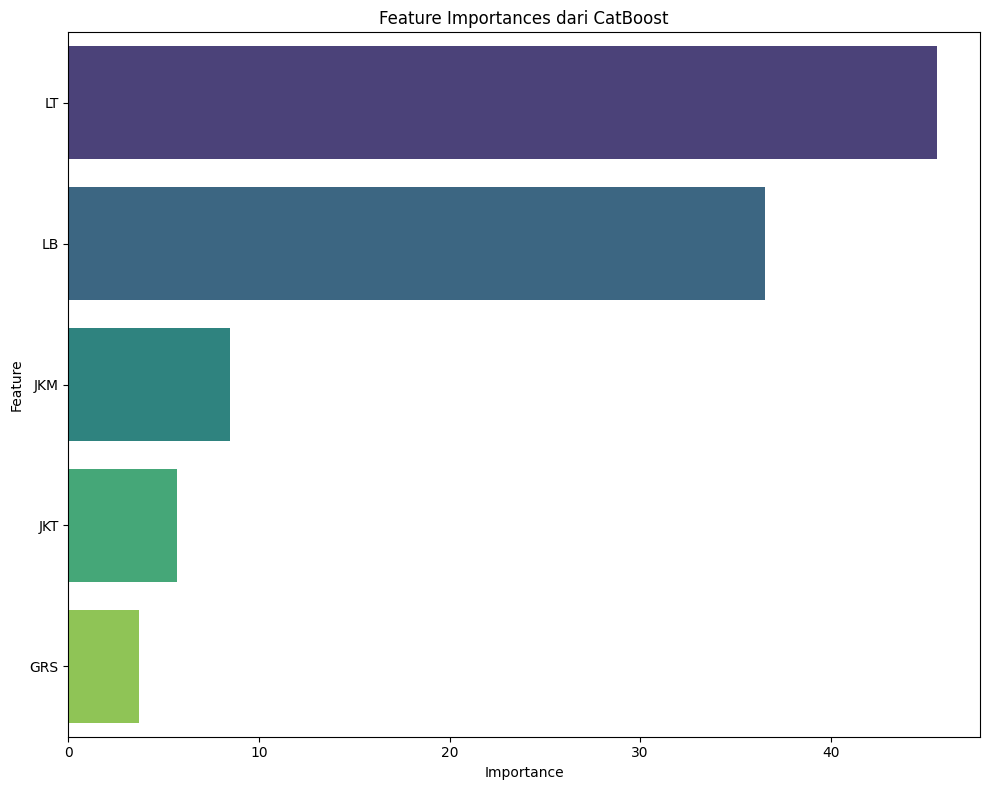

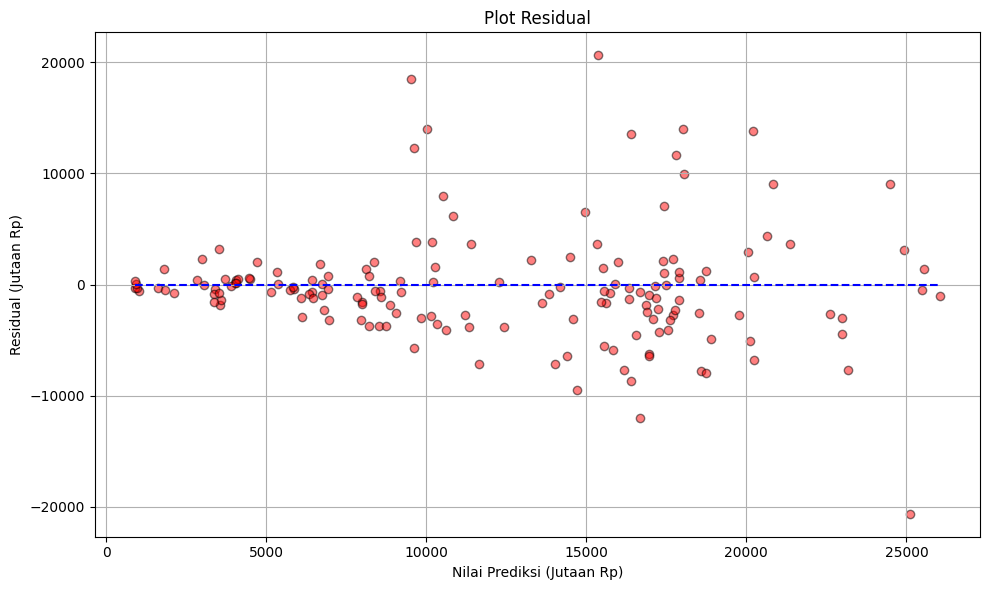

In [75]:
print("\nMenghitung feature importances...")
try:
    feature_importances = model.get_feature_importance()
    feature_names = X_train.columns
          
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 10 Feature Importances:")
    print(importance_df.head(10))

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
    plt.title('Feature Importances dari CatBoost')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error saat membuat plot feature importance: {e}")


# Contoh plot residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
if len(y_pred) > 0:
    plt.scatter(y_pred, residuals, alpha=0.5, color='red', edgecolor='black')
    plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='blue', linestyles='--')
else:
    plt.hlines(0, xmin=0, xmax=1, colors='blue', linestyles='--') 
    print("y_pred kosong, tidak dapat membuat scatter plot residual secara penuh.")
            
plt.xlabel('Nilai Prediksi (Jutaan Rp)')
plt.ylabel('Residual (Jutaan Rp)')
plt.title('Plot Residual')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kesimpulan

Data untuk prediksi harga rumah di Jakarta Selatan sudah dibersihkan dan diproses dengan matang. Kolom harga (HARGA) disesuaikan ke jutaan Rupiah, kolom yang tidak relevan seperti KOTA dihapus, data duplikat dibuang, dan fitur kategori seperti GRS diubah menjadi angka. Outlier pada harga, luas tanah (LT), dan luas bangunan (LB) ditangani menggunakan metode IQR, sehingga didapat dataset bersih dengan 813 baris.

Model CatBoostRegressor digunakan untuk memprediksi harga dengan data training dan testing (80:20). Model menghasilkan Mean Absolute Error sekitar 3.277 juta Rupiah dan R-squared sebesar 0,59, menunjukkan performa yang cukup baik. Fitur luas tanah dan luas bangunan paling berpengaruh dalam prediksi, dan plot residual dibuat untuk mengevaluasi kesalahan model lebih lanjut.